# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 
import datetime
from scipy.stats import linregress


%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

44
['bluff', 'sheridan', 'sioux lookout', 'cape town', 'albany', 'ushuaia', 'new norfolk', 'puerto cabezas', 'comodoro rivadavia', 'petropavlovka', 'vila velha', 'aklavik', 'taolanaro', 'maniitsoq', 'constitucion', 'luderitz', 'arcata', 'kununurra', 'qaanaaq', 'parkes', 'rikitea', 'saint-philippe', 'san andres', 'ilulissat', 'broome', 'camopi', 'port blair', 'naze', 'port alfred', 'geraldton', 'liuzhou', 'gisborne', 'vaini', 'leningradskiy', 'staryy nadym', 'kalmunai', 'belushya guba', 'biak', 'vega de alatorre', 'avarua', 'kupang', 'castro', 'mar del plata', 'pevek']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
pp = pprint.PrettyPrinter(indent=4)

In [5]:
City_name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

index_counter = 0

set_counter = 1

limit = 50

new_limit = 49

for index, city in enumerate(cities, 1):
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    
    try:
        
        City_name.append(city_json['name'])
        Lat.append(city_json["coord"]['lat'])
        Lng.append(city_json["coord"]['lon'])
        Max_Temp.append(city_json['main']['temp_max'])
        Humidity.append(city_json['main']['humidity'])
        Cloudiness.append(city_json['clouds']['all'])
        Wind_Speed.append(city_json["wind"]["speed"])
        Country.append(city_json['sys']['country'])
        Date.append(city_json['dt'])
        if index_counter == limit:
            limit = new_limit
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        print(f'Processing Record {index_counter} of Set{set_counter}: {city}')
    
    except:
        print('City not found. Skipping...')
        time.sleep(2)
        

  
city_data = pd.DataFrame({'City':City_name,
                          'Lat':Lat,
                          'Lng':Lng,
                          'Max Temp':Max_Temp,
                          'Humidity':Humidity,
                          'Cloudiness':Cloudiness,
                          'Wind Speed':Wind_Speed,
                          'Country':Country,
                          'Date':Date})

Processing Record 1 of Set1: bluff
Processing Record 2 of Set1: sheridan
Processing Record 3 of Set1: sioux lookout
Processing Record 4 of Set1: cape town
Processing Record 5 of Set1: albany
Processing Record 6 of Set1: ushuaia
Processing Record 7 of Set1: new norfolk
Processing Record 8 of Set1: puerto cabezas
Processing Record 9 of Set1: comodoro rivadavia
Processing Record 10 of Set1: petropavlovka
Processing Record 11 of Set1: vila velha
Processing Record 12 of Set1: aklavik
City not found. Skipping...
Processing Record 13 of Set1: maniitsoq
Processing Record 14 of Set1: constitucion
Processing Record 15 of Set1: luderitz
Processing Record 16 of Set1: arcata
Processing Record 17 of Set1: kununurra
Processing Record 18 of Set1: qaanaaq
Processing Record 19 of Set1: parkes
Processing Record 20 of Set1: rikitea
Processing Record 21 of Set1: saint-philippe
Processing Record 22 of Set1: san andres
Processing Record 23 of Set1: ilulissat
Processing Record 24 of Set1: broome
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,49.80,84,71,9.57,NZ,1633810712
1,Sheridan,44.8333,-106.9173,51.98,89,90,5.99,US,1633810712
2,Sioux Lookout,50.1001,-91.9170,64.78,82,75,5.75,CA,1633810712
3,Cape Town,-33.9258,18.4232,61.12,62,0,10.36,ZA,1633810624
4,Albany,42.6001,-73.9662,65.68,69,100,3.00,US,1633810457


In [7]:
city_data.to_csv(output_data_file, encoding= "utf-8", index = False, header= True)

In [8]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,4.200000e+01
mean,6.212360,6.348469,60.090000,74.428571,56.214286,8.509524,1.633811e+09
std,40.805914,108.720809,19.321613,13.510868,37.180860,5.684067,1.322331e+02
min,-54.800000,-175.200000,15.660000,37.000000,0.000000,0.960000,1.633810e+09
25%,-28.237050,-75.366300,50.215000,65.250000,20.750000,4.057500,1.633811e+09
50%,1.126200,-45.152200,64.340000,74.500000,57.000000,6.910000,1.633811e+09
75%,42.512725,113.297300,75.277500,83.750000,97.250000,13.622500,1.633811e+09
max,77.484000,178.416700,89.170000,99.000000,100.000000,20.000000,1.633811e+09


In [9]:
weatherwithhumidityover100 = city_data.loc[city_data["Humidity"] > 100]
weatherwithhumidityover100.index

Int64Index([], dtype='int64')

In [10]:
citydataafterdropping = city_data.drop(weatherwithhumidityover100.index,  inplace = False)
citydataafterdropping.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,49.80,84,71,9.57,NZ,1633810712
1,Sheridan,44.8333,-106.9173,51.98,89,90,5.99,US,1633810712
2,Sioux Lookout,50.1001,-91.9170,64.78,82,75,5.75,CA,1633810712
3,Cape Town,-33.9258,18.4232,61.12,62,0,10.36,ZA,1633810624
4,Albany,42.6001,-73.9662,65.68,69,100,3.00,US,1633810457


In [11]:
city_data_duplicate = pd.DataFrame({'City':City_name,
                                    'Lat':Lat,
                                    'Lng':Lng,
                                    'Max Temp':Max_Temp,
                                    'Humidity':Humidity,
                                    'Cloudiness':Cloudiness,
                                    'Wind Speed':Wind_Speed,
                                    'Country':Country,
                                    'Date':Date})

In [12]:
city_data_duplicate.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,49.80,84,71,9.57,NZ,1633810712
1,Sheridan,44.8333,-106.9173,51.98,89,90,5.99,US,1633810712
2,Sioux Lookout,50.1001,-91.9170,64.78,82,75,5.75,CA,1633810712
3,Cape Town,-33.9258,18.4232,61.12,62,0,10.36,ZA,1633810624
4,Albany,42.6001,-73.9662,65.68,69,100,3.00,US,1633810457


In [13]:
humidity = city_data_duplicate["Humidity"]
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Humidity is: 65.25
The upper quartile of Humidity is: 83.75
The interquartile range of Humidity is: 18.5
The the median of Humidity is: 74.5 
Values below 37.5 could be outliers.
Values above 111.5 could be outliers.


In [14]:
outlier_humidity = city_data_duplicate.loc[(city_data_duplicate['Humidity'] < lower_bound) | (city_data_duplicate['Humidity'] > upper_bound)]
outlier_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
8,Comodoro Rivadavia,-45.8667,-67.5,69.66,37,0,13.8,AR,1633810713


In [15]:
outlier_humidity.index

Int64Index([8], dtype='int64')

In [16]:
clean_city_data = city_data_duplicate.drop(outlier_humidity.index,  inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,49.80,84,71,9.57,NZ,1633810712
1,Sheridan,44.8333,-106.9173,51.98,89,90,5.99,US,1633810712
2,Sioux Lookout,50.1001,-91.9170,64.78,82,75,5.75,CA,1633810712
3,Cape Town,-33.9258,18.4232,61.12,62,0,10.36,ZA,1633810624
4,Albany,42.6001,-73.9662,65.68,69,100,3.00,US,1633810457


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

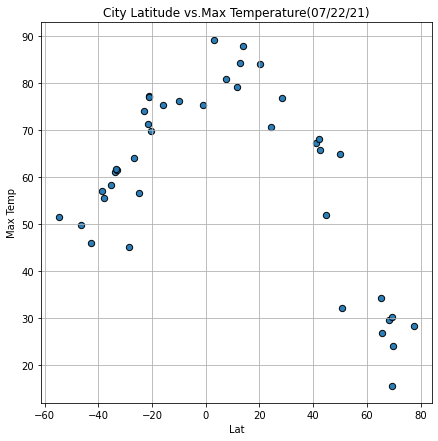

In [19]:
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Max Temperature(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("../output_data/Fig 1.png")
plt.show()

## Latitude vs. Humidity Plot

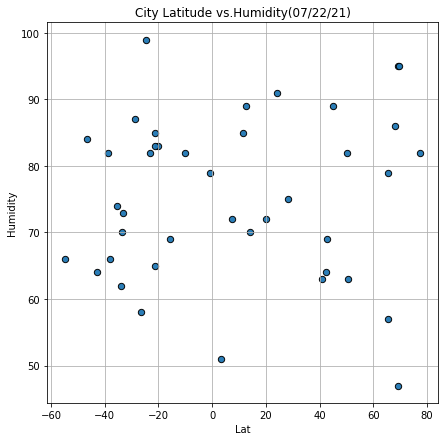

In [20]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Humidity(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("../output_data/Fig 2.png")
plt.show()

## Latitude vs. Cloudiness Plot

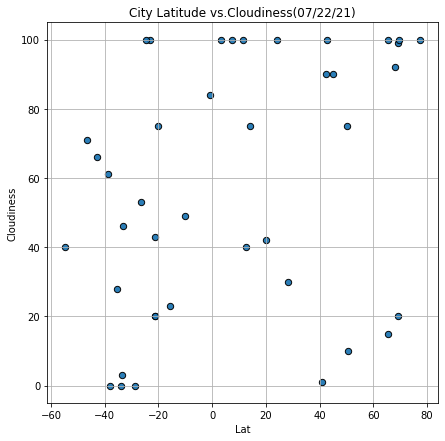

In [21]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.Cloudiness(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

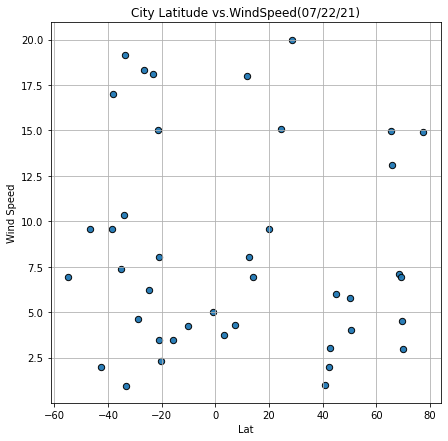

In [22]:
clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="red", edgecolors="black",
                     title="City Latitude vs.WindSpeed(07/22/21)",
                     alpha=0.95,s = 40)
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [23]:
Nothern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
Nothern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Sheridan,44.8333,-106.9173,51.98,89,90,5.99,US,1633810712
2,Sioux Lookout,50.1001,-91.9170,64.78,82,75,5.75,CA,1633810712
4,Albany,42.6001,-73.9662,65.68,69,100,3.00,US,1633810457
7,Puerto Cabezas,14.0351,-83.3888,87.76,70,75,6.91,NI,1633810713
9,Petropavlovka,50.6114,105.3196,32.22,63,10,4.00,RU,1633810713


In [24]:
Southern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]<0]
Southern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,49.80,84,71,9.57,NZ,1633810712
3,Cape Town,-33.9258,18.4232,61.12,62,0,10.36,ZA,1633810624
5,Ushuaia,-54.8000,-68.3000,51.46,66,40,6.91,AR,1633810637
6,New Norfolk,-42.7826,147.0587,45.90,64,66,1.99,AU,1633810437
10,Vila Velha,-20.3297,-40.2925,69.75,83,75,2.30,BR,1633810714


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8858874628830242


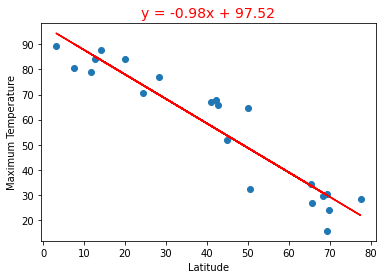

(Northern Hemisphere  - Max Temp vs. Latitude)R square value is: 0.8858874628830242
(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is: y = -0.98x + 97.52


In [25]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 5.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6383246528245933


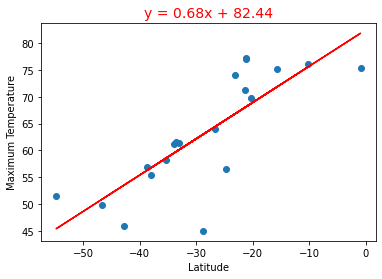

(Southern Hemisphere- Max Temp vs. Latitude)R square value is: 0.6383246528245933
(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is: y = 0.68x + 82.44


In [26]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 6.png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013582703203835504


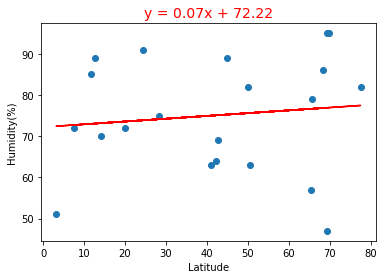

(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is: 0.013582703203835504
(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is: y = 0.07x + 72.22


In [27]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 7.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08410438648566677


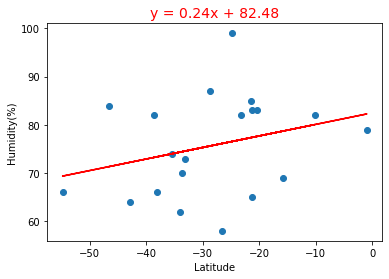

(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is: 0.08410438648566677
(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is: y = 0.24x + 82.48


In [28]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 8.png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0017958455396795555


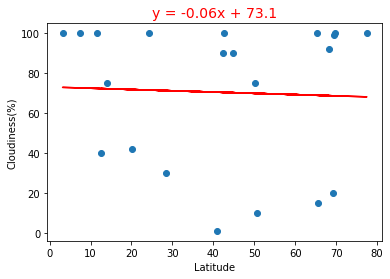

(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is: 0.0017958455396795555
(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is: y = -0.06x + 73.1


In [29]:
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 9.png")
plt.show()
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03489845984381127


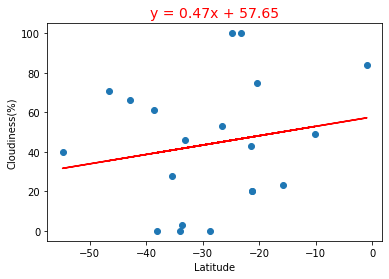

(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is: 0.03489845984381127
(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.47x + 57.65


In [30]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 10 .png")
plt.show()
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001887262662875705


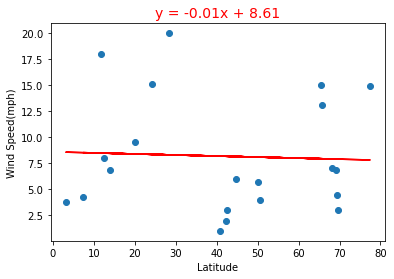

(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is: 0.001887262662875705
(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.01x + 8.61


In [31]:

x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
northern_hemisphere_rvalue = rvalue**2
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 11.png")
plt.show()
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.023103723833926695


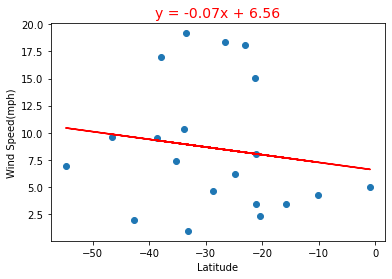

(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is: 0.023103723833926695
(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.07x + 6.56


In [32]:
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'r', fontsize = 14)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig 12.png")
plt.show()
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )